# LINEAR REGRESSION MODEL WITH NUMPY AND PANDAS

## Description:
Building the Linear Regression Model from Scratch.

In [1]:
### Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

plt.style.use('ggplot')
%matplotlib inline

In [3]:
## Importing the dataset

data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0.5, 1.0, 'Salary vs YearsExperience')

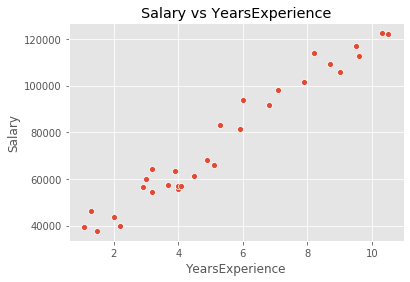

In [5]:
ax = sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = data)
ax.set_title("Salary vs YearsExperience")

The graph clearly depicts a linear relationship between the variables ( YearsExperience and Salary )

### Cost Function
The objective is to minimise the error and find the most accurate intercept and coefficient.
The cost function of Linear Regression is the Mean Squared Error between Predicted vlaue and Actual value. Using the mean squared error function,

Cost_Function(J($\theta$))= 1/(2*m) * $\sum_{i=1}^m$ ((Predicted value - Actual value)$^2$)

here,
    - m is the number of datapoints
    - Predicted value is the dot product of Independent variable and theta,where theta is the weight of our function
    - Actual value is the values of dependent variable 
    
    
    
We find calculate the cost when the X is 0.

In [6]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    
    error = (y_pred - y)**2
    
    return 1/(2*m) * np.sum(error)

We pass the $\theta$ value as 0, and then find predicted value by calculating the dot product of X and theta:
   $\hat{y}$ = X.$\theta$

In [7]:
m = data.YearsExperience.values.size

X = np.append(np.ones((m,1)), data.YearsExperience.values.reshape(m,1), axis = 1)
y = data.Salary.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

3251477635.366667

### Gradient Descent
It is an iterative optimisation algorithm to find the minimum cost in order to find the intercept and coefficient values. 

$\theta$ = $\theta$ - $\alpha$* (1/m)* error

where


$\theta$ = Coefficient 


$\alpha$ = Learning Rate


(1/m)* error = the slope of the function at a given point

In [8]:
def gradient_descent(X,y,theta,alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m *error                   # this proces is repeated until the error is close to zero
        costs.append(cost_function(X,y,theta))
        
    return theta, costs


In [9]:
theta, costs = gradient_descent(X,y, theta, alpha = 0.01, iterations = 10000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                               str(round(theta[1,0], 2))))

h(x) = 25792.2 + 9449.96x1


25792.2 is the intercept and 9449.96  is the coefficient of X.

In [10]:
costs[999]

16526873.153256824

#### Visualising the Cost Function

Text(0.5, 1.0, 'Cost Function using Gradient Descent')

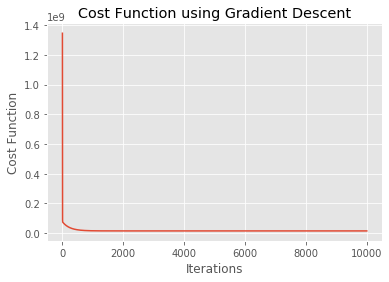

In [11]:
plt.plot(costs)
plt.ylabel("Cost Function")
plt.xlabel("Iterations")
plt.title("Cost Function using Gradient Descent")

In [12]:
theta.shape


(2, 1)

In [13]:
theta

array([[25792.20018347],
       [ 9449.96232371]])

*Fitting Regression Model*

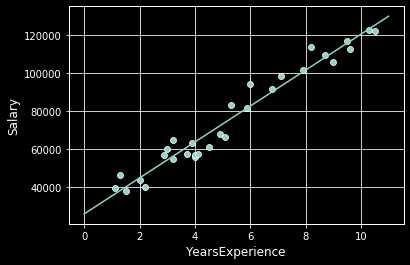

In [14]:
theta = np.squeeze(theta) # remove single dimension from the theta i.e., theta.shape = (2,) to avoid obfuscate code

plt.style.use('dark_background')
sns.scatterplot(x = 'YearsExperience', y = "Salary", data = data)
x_value = [x for x in range(0,12)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

In [16]:
def predict(X,theta):
    y_pred = np.dot(theta.transpose(),X)
    return y_pred

In [17]:
y_pred_1 = predict(np.array([1,1.5]), theta)
print("Salary for 1.5 year of Experience",str(round(y_pred_1,1)))

Salary for 1.5 year of Experience 39967.1


## Validating the results with Sklearn Package

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
# x - Year of Experience (Independent Variable)
# y - Salary ( Dependent Variable)

x = np.array(data.YearsExperience).reshape(-1,1)
y = np.array(data.Salary)


In [21]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# To print the coefficient of determination (R^2) value for the model
model.score(x,y)

0.9569566641435084

In [23]:
model.coef_

array([9449.96232146])

In [24]:
model.intercept_

25792.20019866871

In [25]:
X_new = np.array(1.5).reshape(-1,1)
y_pred = model.predict(X_new)
print("Predicted Salary for 1.5 Year of Experience =",y_pred)

Predicted Salary for 1.5 Year of Experience = [39967.14368085]
